# Regression Model with PyTorch

Using device: cpu
Epoch [1/9], Loss: 8.9125
Epoch [2/9], Loss: 0.2574
Epoch [3/9], Loss: 0.2515
Epoch [4/9], Loss: 0.2553
Epoch [5/9], Loss: 0.2586
Epoch [6/9], Loss: 0.2515
Epoch [7/9], Loss: 0.2542
Epoch [8/9], Loss: 0.2509
Epoch [9/9], Loss: 0.2495


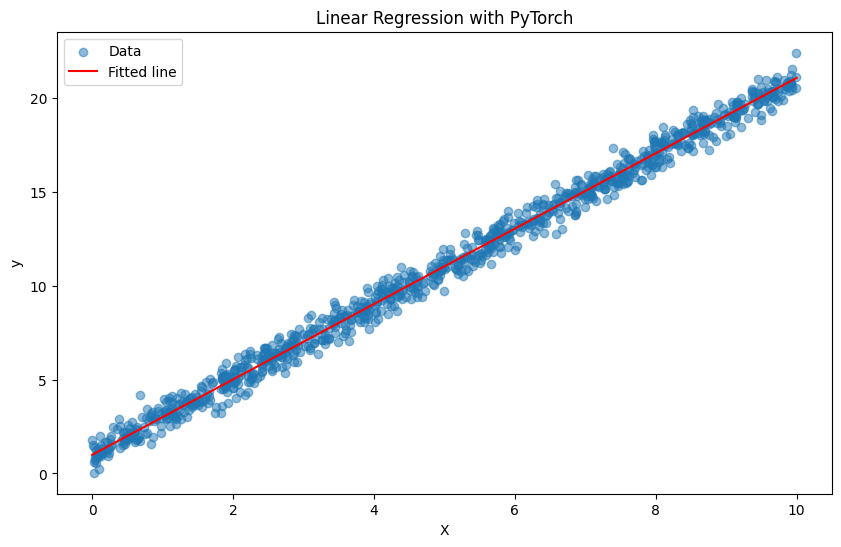

Learned parameters: W = 2.0055, b = 0.9929


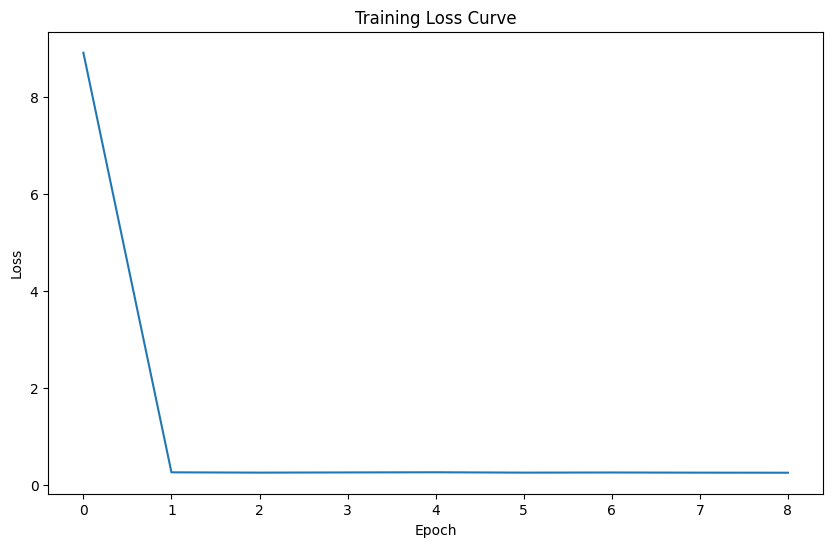

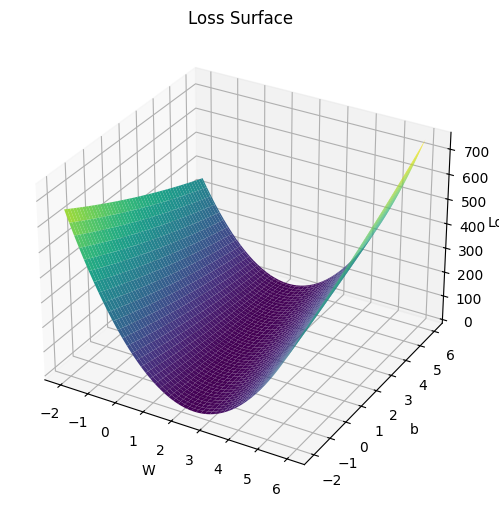

In [2]:
'''
Purpose:
    This code demonstrates the implementation of a simple linear regression model using PyTorch. It includes the creation of a custom dataset,
    defining a linear regression model, training the model, evaluating its performance, and visualizing the results.

Summary:
    - A custom dataset is created with a linear relationship between input (X) and output (y) with added noise.
    - A linear regression model is defined using PyTorch's nn.Module.
    - The dataset is loaded using DataLoader, and the model, loss function, and optimizer are instantiated.
    - The model is trained over several epochs, and the training loss is recorded.
    - The trained model is evaluated on a test set, and the results are plotted.
    - The learned parameters of the model are printed, and the training loss curve is plotted.
    - A 3D loss surface with respect to the model parameters is plotted to visualize the loss landscape.
'''

# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Create a custom dataset
class LinearRegressionDataset(Dataset):
    def __init__(self, num_samples=1000):
        self.X = torch.rand(num_samples, 1) * 10
        self.y = 2 * self.X + 1 + torch.randn(num_samples, 1) * 0.5

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Define the model
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# Instantiate the dataset, model, loss function, and optimizer
dataset = LinearRegressionDataset()
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

model = LinearRegression().to(device)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 9
losses = []

for epoch in range(epochs):
    epoch_loss = 0
    for batch_X, batch_y in dataloader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        # Forward pass
        y_pred = model(batch_X)
        loss = criterion(y_pred, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(dataloader)
    losses.append(avg_loss)

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    X_test = torch.linspace(0, 10, 100).view(-1, 1).to(device)
    y_pred = model(X_test)

# Move tensors to CPU for plotting
X_test = X_test.cpu()
y_pred = y_pred.cpu()

# Step 6: Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(dataset.X, dataset.y, label='Data', alpha=0.5)
plt.plot(X_test, y_pred, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression with PyTorch')
plt.show()

# Print model parameters
print(f"Learned parameters: W = {model.linear.weight.item():.4f}, b = {model.linear.bias.item():.4f}")

# Plot loss curve
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

# Plot the 3D loss surface with respect to the model parameters
W = torch.linspace(-2, 6, 100)
b = torch.linspace(-2, 6, 100)
W, b = torch.meshgrid(W, b, indexing='ij')
losses = torch.zeros(W.shape)

# Calculate the loss for each combination of W and b
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        model.linear.weight.data = W[i, j].reshape(1, 1)
        model.linear.bias.data = b[i, j].reshape(1)
        y_pred = model(dataset.X)
        loss = criterion(y_pred, dataset.y)
        losses[i, j] = loss.item()

# Plot the loss surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W.numpy(), b.numpy(), losses.numpy(), cmap='viridis')
ax.set_xlabel('W')
ax.set_ylabel('b')
ax.set_zlabel('Loss')
ax.set_title('Loss Surface')
plt.show()